# World Happiness 

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
world_happiness_df = pd.read_csv("World-happiness-report-updated_2024.csv", encoding="latin1")

In [3]:
world_happiness_df.shape

(2363, 11)

There are 2,363 rows and 11 columns.

In [4]:
world_happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


In [5]:
world_happiness_df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2335.000000,2350.000000,2300.000000,2327.000000,2282.000000,2238.000000,2339.000000,2347.000000
mean,2014.763860,5.483566,9.399671,0.809369,63.401828,0.750282,0.000098,0.743971,0.651882,0.273151
std,5.059436,1.125522,1.152069,0.121212,6.842644,0.139357,0.161388,0.184865,0.106240,0.087131
min,2005.000000,1.281000,5.527000,0.228000,6.720000,0.228000,-0.340000,0.035000,0.179000,0.083000
25%,2011.000000,4.647000,8.506500,0.744000,59.195000,0.661000,-0.112000,0.687000,0.572000,0.209000
50%,2015.000000,5.449000,9.503000,0.834500,65.100000,0.771000,-0.022000,0.798500,0.663000,0.262000
75%,2019.000000,6.323500,10.392500,0.904000,68.552500,0.862000,0.093750,0.867750,0.737000,0.326000
max,2023.000000,8.019000,11.676000,0.987000,74.600000,0.985000,0.700000,0.983000,0.884000,0.705000


In [6]:
world_happiness_df.sample()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
974,Israel,2009,7.353,10.408,0.937,71.32,0.593,0.167,0.923,0.62,0.327


Life Ladder → This is the actual happiness score (0–10).

Log GDP per capita → Economic factor, log-scaled for comparability.

Social support → Proportion of people with someone to rely on.

Healthy life expectancy at birth → Years expected in good health.

Freedom to make life choices → Satisfaction with freedom.

Generosity → Adjusted measure of charitable giving (can be negative).

Perceptions of corruption → Higher values = higher perceived corruption.

Positive affect / Negative affect → Average emotions reported.

Year → Lets you see trends over time.

In [7]:
# Datatypes
world_happiness_df.dtypes

Country name                         object
year                                  int64
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

In [8]:
# Missing values per column
world_happiness_df.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64

We need to make a decesion on whether to populate missing entries or drop them all together. I thin

In [9]:
# Unique counts for country 
world_happiness_df["Country name"].nunique()

165

In [10]:
world_happiness_df["Country name"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 

Text(0.5, 1.0, 'Correlation of Factors with Happiness (Life Ladder)')

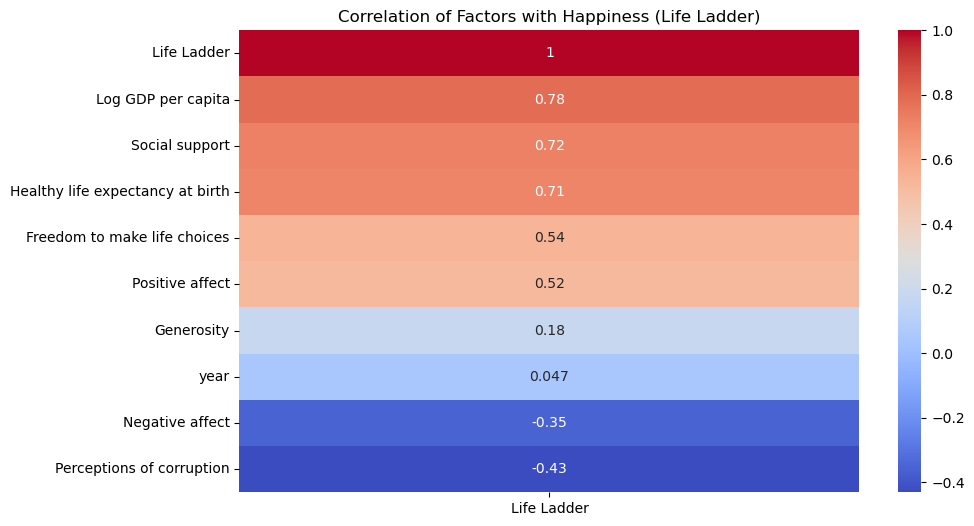

In [11]:
corr = world_happiness_df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr[["Life Ladder"]].sort_values(by="Life Ladder", ascending=False), annot=True, cmap="coolwarm")
plt.title("Correlation of Factors with Happiness (Life Ladder)")

(Strong Positive Correlations)

* Log GDP per capita - Economic prosperity is the strongest driver of happiness.

* Social support - Having friends/family to rely on is almost as important as wealth.

* Healthy life expectancy - Living longer in good health strongly links to higher happiness.

(Moderate Positive Correlations)

* Freedom to make life choices - Societies with more freedom report higher happiness.

* Positive affect - More frequent positive emotions → higher happiness.

(Weak Positive Correlation)

* Generosity - Some link, but relatively weak.

(Weak/No Correlation)

* Year - Global happiness doesn’t show a strong linear trend by year (it’s fairly stable on average).

(Negative Correlations)

* Perceptions of corruption - More corruption → less happiness.

* Negative affect - More negative emotions → less happiness.

In [12]:
# Average values per country (across all years)
country_avg = world_happiness_df.groupby("Country name", as_index=False).mean(numeric_only=True)

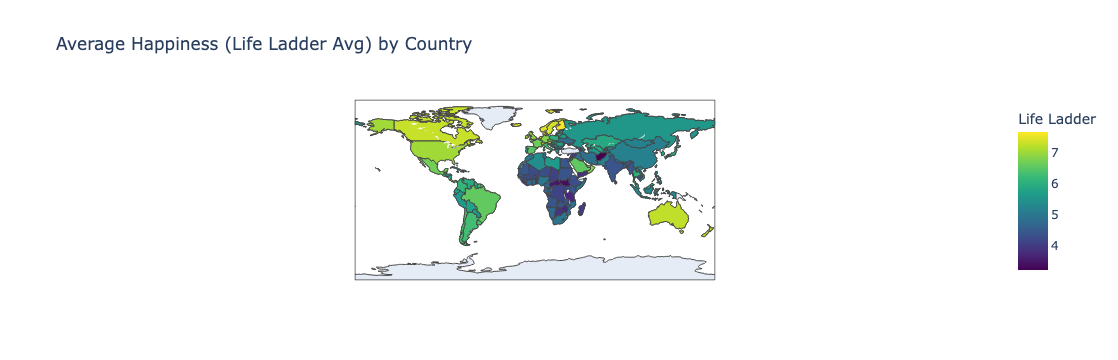

In [15]:
fig = px.choropleth(
    country_avg,
    locations="Country name",        # country names
    locationmode="country names",    # use names instead of ISO codes
    color="Life Ladder",             # column to color by
    hover_name="Country name",       # tooltip
    color_continuous_scale="Viridis",# color palette
    title="Average Happiness (Life Ladder Avg) by Country"
)
fig.show()

In [20]:
# Compute average happiness per country
country_happiness_avg = (
    world_happiness_df.groupby("Country name")["Life Ladder"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={"Life Ladder": "Average Happiness"})
)

In [21]:
country_happiness_avg.head(10)

,Country name,Average Happiness
0,Denmark,7.664111
1,Finland,7.624062
2,Iceland,7.468000
3,Norway,7.463846
4,Netherlands,7.440412
5,Switzerland,7.435692
6,Sweden,7.365167
7,Canada,7.296833
8,New Zealand,7.260706
9,Australia,7.242412
